<a href="https://colab.research.google.com/github/TanmayDhar36/ML-Case-Study-on-Water-Quality-Analysis/blob/main/ML_case_study_on_Water_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **ML case study on Water Quality Analysis**#

**Contribution** - Individual

**Author** - Tanmay Dhar

# **1.Problem Statement** #

Water quality analysis is crucial for ensuring public health and environmental sustainability. Traditional methods often involve time-consuming and expensive laboratory analysis. This case study aims to explore the potential of machine learning (ML) for water quality analysis using supervised classification techniques. Specifically, the focus will be on utilizing AUC-ROC, precision, and recall metrics to evaluate the performance of various ML models in predicting water potability based on physicochemical parameters.

**Industry and Problem Type:**

* **Industry:** Environmental Engineering, Water Management

* **Problem Type:** Supervised Classification

**Business Objective**

Develop a machine learning model to accurately predict the water quality (potable/non-potable or safe/unsafe) based on various physicochemical parameters.

Desired outcome will be improve the water quality monitoring and decision-making, reduce waterborne disease outbreaks and optimize resource allocation for water treatment.

**Constraints & Limitations**

* **Computational Power:** Access to sufficient computational resources for training and evaluating the model.
Budget: Funding limitations for data acquisition, model development, and deployment.
* **Data Availability:** Availability of accurate and relevant water quality data with comprehensive parameter information.
* **Obstacles:** Potential data biases, missing values, and the complex nature of water quality dynamics.

**Evaluation Metrics**

* **Optimization Required:** Maximize AUC-ROC and F1-score to achieve a balance between precision and recall.
* **KPIs Tracking:** Monitor sensitivity, specificity, and accuracy for different water quality categories.
* **Required Testing:** Conduct rigorous testing on unseen data to ensuregeneralizability and robustness of the model.

**Relevancy to the Target Audience**

* **Model Prediction Usage:** Quick and reliable predictions to inform water quality management decisions in real-time.

**Data Availability**

* **Ease of Data Collection:** Explore open-source datasets or collaborate with environmental agencies and water treatment plants for data access.
* **Necessary Features Required:** Ensure data includes relevant parameters like pH, conductivity, dissolved oxygen, and target variable (potable/non-potable or safe/unsafe).

**Scope of the Solution**

* **Capabilities:** Develop a model that can predict various water quality categories with high accuracy and provide insights into potential contaminants or water quality issues.
* **Expectation Management:** The model should be interpreted as a tool for aiding decision-making, not a definitive solution.

**Deployment Considerations**

* **Deployment Platform:** Consider cloud platforms (AWS, Azure, GCP) for scalability and accessibility.
* **Integration Options:** Integrate the model with water management systems or develop a web application for user interaction and visualization.

# **2. Data Collection**

**Source:** https://www.kaggle.com/datasets/adityakadiwal/water-potability

**About Dataset**

* **Context:** Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

* **Content:** The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

# **3. Data Preprocessing**

In [ ]:
# Import Libraries numpy, pandas, seaborn and metlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the data from csv files
data = pd.read_csv('/content/drive/MyDrive/Data Sets/water_potability.csv')

In [ ]:
data.head().style.background_gradient(cmap ="Pastel1")

In [ ]:
# dataset columns
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
# Checking number of rows & column
data.shape

(3276, 10)

In [ ]:
# Data Sets Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# Checking Douplicates
data.duplicated().sum()

0

In [ ]:
# Checking Null Values or Missing values
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
# Describe
data.describe().T

count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.073546    359.950170    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.622485     77.337473    124.000000  
Turbidity            3.955028      4.500320      6.739000  
Potability           0.000000      1.000000      1.000000

In [ ]:
# Impute the missing values for numerical columns with their mean
data.fillna(data.mean(), inplace=True)

In [ ]:
#Checking is there any null values or missing after dropping
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
# Save the cleaned dataset
data.to_csv('/content/drive/MyDrive/New_water_potability.csv', index=False)

**Handling Outliers**

Rows with outliers:
             ph    Hardness        Solids  Chloramines     Sulfate  \
37     5.618064  304.235912  17281.975168     6.101084  333.775777   
61     6.391354  213.017830  20965.478309     5.375560  327.650543   
66     5.058109  238.569380  34873.934523     8.983276  374.433505   
80     1.844538  233.764343  28689.595778     7.724432  333.775777   
88    10.155440  300.292476  12652.362979     6.655126  398.647786   
...         ...         ...           ...          ...         ...   
3184   8.285072  151.573778  14402.726696     9.050080  303.081838   
3190   9.293622  193.061723  50166.533323     6.301884  333.775777   
3221   4.034063  303.702627  33219.074545     4.425559  333.775777   
3226   7.870853  210.627825  51731.820553     6.190963  333.775777   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
37      399.471566       12.265002        81.588992   2.896547

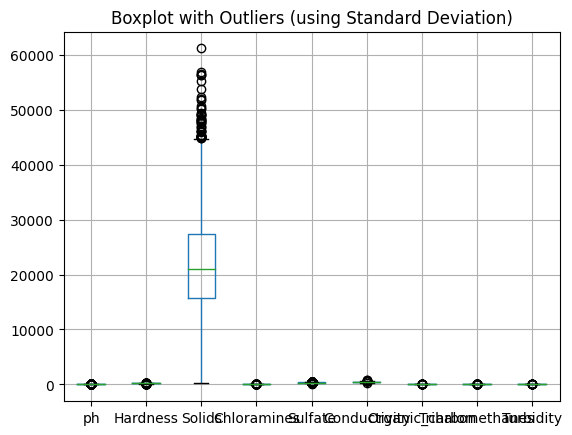

In [ ]:
#1.Using Standard Deviation in Symmetric Curve

# Define columns to check for outliers
columns_to_check = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Calculate z-scores
z_scores = np.abs(zscore(data[columns_to_check]))

# Define a threshold for outliers (e.g., z_score > 3)
outliers = (z_scores > 3).any(axis=1)

# Display rows with outliers
outliers_data = data[outliers]
print("Rows with outliers:")
print(outliers_data)

# Visualize data with outliers using box plots
data[columns_to_check].boxplot()
plt.title('Boxplot with Outliers (using Standard Deviation)')
plt.show()

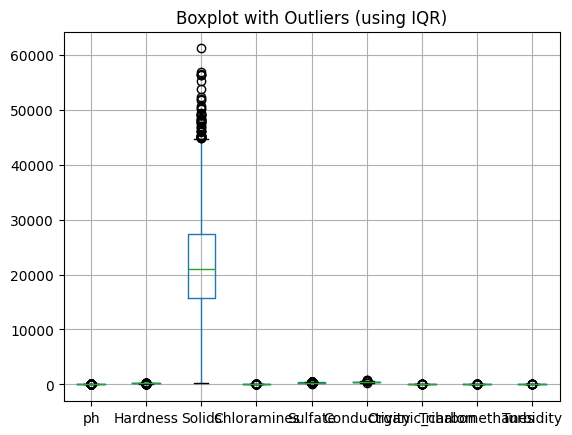

In [ ]:
# 2.Using IQR in skew-symmetric Curve

# Calculate IQR
Q1 = data[columns_to_check].quantile(0.25)
Q3 = data[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = ((data[columns_to_check] < lower_bound) | (data[columns_to_check] > upper_bound)).any(axis=1)

# Remove outliers
data_no_outliers_iqr = data[~outliers_iqr]

# Visualize data without outliers
data[columns_to_check].boxplot()
plt.title('Boxplot with Outliers (using IQR)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


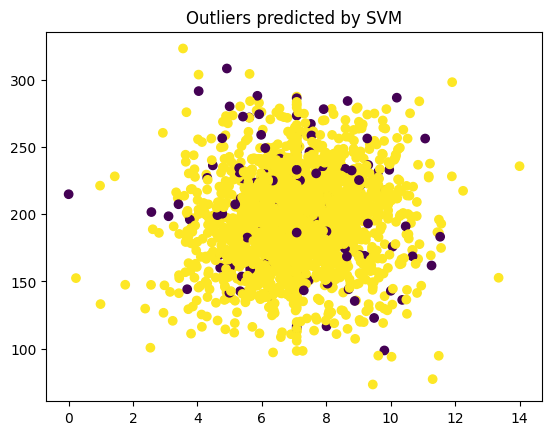

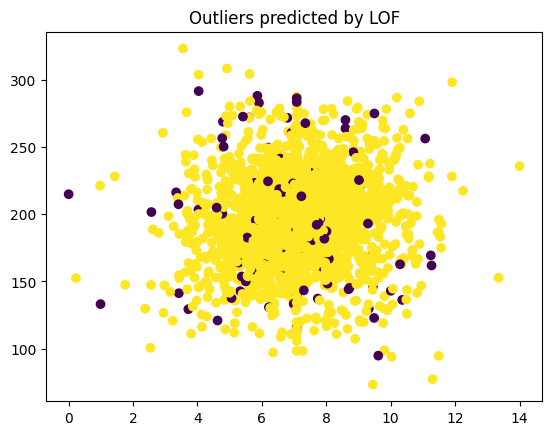

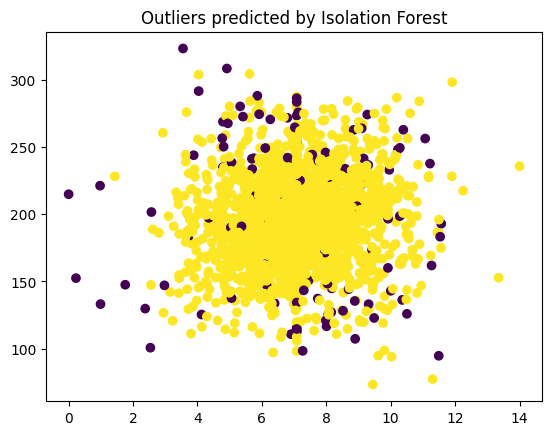

In [ ]:
# 3.Using Outlier Insensitive Algorithms.i.e. SVM, KNN, Decision Tree

# Split data into features and target
X = data[columns_to_check]
y = data['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit One-Class SVM
svm_model = OneClassSVM(nu=0.05)  # Adjust nu parameter as needed
svm_outliers = svm_model.fit_predict(X_train)

# Fit Local Outlier Factor
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # Adjust parameters as needed
lof_outliers = lof_model.fit_predict(X_train)

# Fit Isolation Forest
if_model = IsolationForest(contamination=0.05)  # Adjust contamination parameter as needed
if_outliers = if_model.fit_predict(X_train)

# Visualize outliers predicted by SVM
plt.scatter(X_train['ph'], X_train['Hardness'], c=svm_outliers, cmap='viridis')
plt.title('Outliers predicted by SVM')
plt.show()

# Visualize outliers predicted by LOF
plt.scatter(X_train['ph'], X_train['Hardness'], c=lof_outliers, cmap='viridis')
plt.title('Outliers predicted by LOF')
plt.show()

# Visualize outliers predicted by Isolation Forest
plt.scatter(X_train['ph'], X_train['Hardness'], c=if_outliers, cmap='viridis')
plt.title('Outliers predicted by Isolation Forest')
plt.show()


**Categorical Encoding**

In [ ]:
# Nominal Encoding
data_nominal_encoded = pd.get_dummies(data, columns=['Potability'], prefix='Potability')

# Display the results
print("Nominal Encoded Data:")
print(data_nominal_encoded.head())

Nominal Encoded Data:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability_0  Potability_1  
0       10.379783        86.990970   2.963135             1             0  
1       15.180013        56.329076   4.500656             1             0  
2       16.868637        66.420093   3.055934             1             0  
3       18.436524       100.341674   4.628771             1             0  
4       11.558279        31.997993   4.075075             1             0  


In [ ]:
# One-Hot Encoding
data_one_hot_encoded = pd.get_dummies(data, columns=['Potability'], drop_first=True, prefix='Potability')

# Display the result
print("\nOne-Hot Encoded Data:")
print(data_one_hot_encoded.head())


One-Hot Encoded Data:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability_1  
0       10.379783        86.990970   2.963135             0  
1       15.180013        56.329076   4.500656             0  
2       16.868637        66.420093   3.055934             0  
3       18.436524       100.341674   4.628771             0  
4       11.558279        31.997993   4.075075             0  


In [ ]:
# Mean Encoding
mean_encoded_data = data.groupby('Potability')['ph'].mean().reset_index()
data_mean_encoded = pd.merge(data, mean_encoded_data, on='Potability', how='left')
data_mean_encoded.rename(columns={'ph_y': 'MeanEncoded_ph'}, inplace=True)

# Display The Result
print("\nMean Encoded Data:")
print(data_mean_encoded.head())


Mean Encoded Data:
       ph_x    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  MeanEncoded_ph  
0       10.379783        86.990970   2.963135           0        7.084658  
1       15.180013        56.329076   4.500656           0        7.084658  
2       16.868637        66.420093   3.055934           0        7.084658  
3       18.436524       100.341674   4.628771           0        7.084658  
4       11.558279        31.997993   4.075075           0        7.084658  


In [ ]:
# Ordinal Encoding (assuming Potability is ordinal, if not, skip this)
ordinal_mapping = {0: 'Not Potable', 1: 'Potable'}
data['Potability'] = data['Potability'].map(ordinal_mapping)

#Display The Result
print("\nOrdinal Encoded Data:")
print(data.head())  # Assuming Potability is ordinal


Ordinal Encoded Data:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity   Potability  
0       10.379783        86.990970   2.963135  Not Potable  
1       15.180013        56.329076   4.500656  Not Potable  
2       16.868637        66.420093   3.055934  Not Potable  
3       18.436524       100.341674   4.628771  Not Potable  
4       11.558279        31.997993   4.075075  Not Potable  


In [ ]:
# Label Encoding
label_encoder = LabelEncoder()
data['LabelEncoded_Potability'] = label_encoder.fit_transform(data['Potability'])

# Display The Result
print("\nLabel Encoded Data:")
print(data[['Potability', 'LabelEncoded_Potability']].head())


Label Encoded Data:
    Potability  LabelEncoded_Potability
0  Not Potable                        0
1  Not Potable                        0
2  Not Potable                        0
3  Not Potable                        0
4  Not Potable                        0


In [ ]:
# Target Guided Ordinal Encoding
mean_encoded_data = data.groupby('Potability')['ph'].mean().reset_index()
ordinal_mapping = mean_encoded_data.sort_values('ph').reset_index(drop=True).reset_index().set_index('Potability')['index'].to_dict()
data['TargetGuidedOrdinalEncoded_Potability'] = data['Potability'].map(ordinal_mapping)

# Display the results
print("\nTarget Guided Ordinal Encoded Data:")
print(data[['Potability', 'TargetGuidedOrdinalEncoded_Potability']].head())



Target Guided Ordinal Encoded Data:
    Potability  TargetGuidedOrdinalEncoded_Potability
0  Not Potable                                      1
1  Not Potable                                      1
2  Not Potable                                      1
3  Not Potable                                      1
4  Not Potable                                      1


In [ ]:
# Count (or Frequency) Encoding
count_encoded_data = data['Potability'].value_counts().to_dict()
data['CountEncoded_Potability'] = data['Potability'].map(count_encoded_data)

# Display the results
print("\nCount Encoded Data:")
print(data[['Potability', 'CountEncoded_Potability']].head())


Count Encoded Data:
    Potability  CountEncoded_Potability
0  Not Potable                     1998
1  Not Potable                     1998
2  Not Potable                     1998
3  Not Potable                     1998
4  Not Potable                     1998


In [ ]:
# Probability Ratio Encoding (assuming Potability is binary)
prob_ratio_data = data.groupby('Potability')['ph'].mean()
data['ProbRatioEncoded_Potability'] = data['Potability'].map(prob_ratio_data)

# Display the results
print("\nProbability Ratio Encoded Data:")
print(data[['Potability', 'ProbRatioEncoded_Potability']].head())


Probability Ratio Encoded Data:
    Potability  ProbRatioEncoded_Potability
0  Not Potable                     7.084658
1  Not Potable                     7.084658
2  Not Potable                     7.084658
3  Not Potable                     7.084658
4  Not Potable                     7.084658


**Data Transformation**

In [ ]:
# Adding library
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

In [ ]:
# Extract the features for transformation
features_to_transform = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [ ]:
# 1. Standardisation
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(data[features_to_transform]), columns=features_to_transform)
# Display the results
print("\nStandardized Data:")
print(data_standardized.head())


Standardized Data:
             ph  Hardness    Solids  Chloramines       Sulfate  Conductivity  \
0 -6.043133e-16  0.259195 -0.139471     0.112415  9.613574e-01      1.708954   
1 -2.289339e+00 -2.036414 -0.385987    -0.307694  3.145987e-15      2.062575   
2  6.928678e-01  0.847665 -0.240047     1.360594  3.145987e-15     -0.094032   
3  8.409504e-01  0.547651  0.000493     0.592008  6.395190e-01     -0.778830   
4  1.368569e+00 -0.464429 -0.460249    -0.363698 -6.541765e-01     -0.343939   

   Organic_carbon  Trihalomethanes  Turbidity  
0       -1.180651         1.306149  -1.286298  
1        0.270597        -0.638480   0.684218  
2        0.781117         0.001509  -1.167365  
3        1.255134         2.152874   0.848412  
4       -0.824357        -2.181599   0.138786  


In [ ]:
# 2. Normalisation
min_max_scaler = MinMaxScaler()
data_normalized = pd.DataFrame(min_max_scaler.fit_transform(data[features_to_transform]), columns=features_to_transform)
# Display the result
print("\nNormalized Data:")
print(data_normalized.head())


Normalized Data:
         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.505771  0.571139  0.336096     0.543891  0.680385      0.669439   
1  0.265434  0.297400  0.300611     0.491839  0.581699      0.719411   
2  0.578509  0.641311  0.321619     0.698543  0.581699      0.414652   
3  0.594055  0.605536  0.356244     0.603314  0.647347      0.317880   
4  0.649445  0.484851  0.289922     0.484900  0.514545      0.379337   

   Organic_carbon  Trihalomethanes  Turbidity  
0        0.313402         0.699753   0.286091  
1        0.497319         0.450999   0.576793  
2        0.562017         0.532866   0.303637  
3        0.622089         0.808065   0.601015  
4        0.358555         0.253606   0.496327  


In [ ]:
# 3. Robust Scaler
robust_scaler = RobustScaler()
data_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(data[features_to_transform]), columns=features_to_transform)
# Display the result
print("\nRobust Scaled Data:")
print(data_robust_scaled.head())


Robust Scaled Data:
         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.000000  0.198981 -0.011702     0.085492  1.043542      1.227178   
1 -2.113014 -1.696382 -0.196962    -0.249088  0.000000      1.473406   
2  0.639503  0.684850 -0.087287     1.079558  0.000000     -0.028251   
3  0.776180  0.437145  0.093483     0.467446  0.694190     -0.505079   
4  1.263161 -0.398477 -0.252771    -0.293690 -0.710100     -0.202262   

   Organic_carbon  Trihalomethanes  Turbidity  
0       -0.854560         1.028759  -0.935210  
1        0.214093        -0.502884   0.514449  
2        0.590024         0.001189  -0.847715  
3        0.939076         1.695662   0.635242  
4       -0.592197        -1.718287   0.113188  


In [ ]:
# 4. Sum of (median - observation) / IQR
median = data[features_to_transform].median()
iqr = data[features_to_transform].quantile(0.75) - data[features_to_transform].quantile(0.25)
data_sum_median_iqr = data[features_to_transform] + (median - data[features_to_transform]) / iqr

# Display The result
print("\nSum of (median - observation) / IQR:")
print(data_sum_median_iqr.head())


Sum of (median - observation) / IQR:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.691474  20791.330683     7.214720  367.472900    563.081476   
1  5.829094  131.119303  18630.254820     6.884333  333.775777    591.411953   
2  7.459621  223.551409  19909.629019     8.196326  333.775777    418.634464   
3  7.540586  213.936249  22018.323957     7.591886  356.191946    363.771596   
4  7.829062  181.499986  17979.239110     6.840290  310.845838    398.613076   

   Organic_carbon  Trihalomethanes  Turbidity  
0       11.234343        85.962212   3.898345  
1       14.965920        56.831961   3.986208  
2       16.278613        66.418904   3.903648  
3       17.497449        98.646012   3.993529  
4       12.150476        33.716279   3.961888  


In [ ]:
# 5. Box-Cox Transformation
from scipy.stats import boxcox
# Function to apply Box-Cox transformation if values are positive
def boxcox_transform(column):
    if all(column > 0):
        transformed_column, _ = boxcox(column)
        return transformed_column
    else:
        return column

data_boxcox_transformed = data[features_to_transform].apply(boxcox_transform)
# Display the result
print("\nBox-Cox Transformed Data:")
print(data_boxcox_transformed.head())


Box-Cox Transformed Data:
         ph    Hardness      Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  335.510207  347.300514     6.862164  949.753436     30.634938   
1  3.716080  200.820115  327.784397     6.107624  844.113713     31.315260   
2  8.099124  371.057977  339.460582     9.129163  844.113713     26.804185   
3  8.316766  352.889622  357.951918     7.729014  914.167956     25.144223   
4  9.092223  292.321141  321.696327     6.007399  773.401013     26.214263   

   Organic_carbon  Trihalomethanes  Turbidity  
0        8.930228       132.431191   1.968285  
1       13.366626        81.007803   3.514074  
2       14.916078        97.628316   2.061503  
3       16.350428       155.577635   3.642988  
4       10.024383        42.548791   3.085950  


In [ ]:
# 6. Gaussian Transformation (assuming 'ph' follows Gaussian distribution)
data['Gaussian_Transformed_ph'] = np.power(data['ph'], 1/3)

# Display the result
print("\nGaussian Transformed Data:")
print(data[['ph', 'Gaussian_Transformed_ph']].head())


Gaussian Transformed Data:
         ph  Gaussian_Transformed_ph
0  7.080795                 1.920263
1  3.716080                 1.548918
2  8.099124                 2.008226
3  8.316766                 2.026056
4  9.092223                 2.087165


In [ ]:
# 7. Logarithmic Transformation
data_log_transformed = np.log1p(data[features_to_transform])
# Display the result
print("\nLogarithmic Transformed Data:")
print(data_log_transformed.head())


Logarithmic Transformed Data:
         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  2.089490  5.327344  9.942339     2.116281  5.912195      6.337372   
1  1.550978  4.870782  9.832585     2.032775  5.813461      6.386686   
2  2.208178  5.417150  9.899005     2.329800  5.813461      6.039317   
3  2.231816  5.372373  9.999680     2.203795  5.880215      5.897886   
4  2.311765  5.204564  9.797015     2.021097  5.740229      5.989990   

   Organic_carbon  Trihalomethanes  Turbidity  
0        2.431838         4.477234   1.377035  
1        2.783777         4.048808   1.704867  
2        2.883047         4.210943   1.400181  
3        2.967154         4.618498   1.727891  
4        2.530380         3.496447   1.624341  


In [ ]:
# 8. Inverse Transformation
data_inverse_transformed = 1 / data[features_to_transform]

#Display the result
print("\nInverse Transformed Data:")
print(data_inverse_transformed.head())


Inverse Transformed Data:
         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.141227  0.004881  0.000048     0.136982  0.002714      0.001772   
1  0.269101  0.007727  0.000054     0.150710  0.002996      0.001687   
2  0.123470  0.004460  0.000050     0.107806  0.002996      0.002389   
3  0.120239  0.004665  0.000045     0.124080  0.002802      0.002753   
4  0.109984  0.005522  0.000056     0.152751  0.003224      0.002510   

   Organic_carbon  Trihalomethanes  Turbidity  
0        0.096341         0.011495   0.337480  
1        0.065876         0.017753   0.222190  
2        0.059282         0.015056   0.327232  
3        0.054240         0.009966   0.216040  
4        0.086518         0.031252   0.245394  


In [ ]:
# 9. Square Root Transformation
data_sqrt_transformed = np.sqrt(data[features_to_transform])

# Display the result
print("\nSquare Root Transformed Data:")
print(data_sqrt_transformed.head())


Square Root Transformed Data:
         ph   Hardness      Solids  Chloramines    Sulfate  Conductivity  \
0  2.660976  14.313995  144.191952     2.701890  19.196782     23.755182   
1  1.927714  11.376419  136.491970     2.575897  18.269531     24.349237   
2  2.845896  14.974520  141.101176     3.045634  18.269531     20.459868   
3  2.883880  14.641496  148.386042     2.838896  18.891430     19.059552   
4  3.015331  13.457396  134.085742     2.558632  17.610671     19.960231   

   Organic_carbon  Trihalomethanes  Turbidity  
0        3.221767         9.326895   1.721376  
1        3.896154         7.505270   2.121475  
2        4.107145         8.149852   1.748123  
3        4.293777        10.017069   2.151458  
4        3.399747         5.656677   2.018682  


In [ ]:
# 10. Exponential Transformation
data_exp_transformed = np.exp(data[features_to_transform])

# Display the result
print("\nExponential Transformed Data:")
print(data_exp_transformed.head())


Exponential Transformed Data:
            ph      Hardness  Solids   Chloramines        Sulfate  \
0  1188.912740  9.611567e+88     inf   1480.613597  1.108299e+160   
1    41.102957  1.613096e+56     inf    761.466275  9.056867e+144   
2  3291.584008  2.424209e+97     inf  10677.388954  9.056867e+144   
3  4091.904891  1.262357e+93     inf   3163.177621  9.855516e+154   
4  8885.921562  4.481115e+78     inf    696.870763  4.900489e+134   

    Conductivity  Organic_carbon  Trihalomethanes   Turbidity  
0  1.191611e+245    3.220198e+04     6.021413e+37   19.358573  
1  3.067891e+257    3.913776e+06     2.906745e+24   90.076227  
2  6.285914e+181    2.118146e+07     7.012610e+28   21.241010  
3  5.816255e+157    1.015970e+08     3.782993e+43  102.388104  
4  1.065658e+173    1.046398e+05     7.880462e+13   58.854920  


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


**Handling Imbalanced Dataset**

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Assuming your data is stored in a DataFrame called 'data' and the target variable is 'Potability'
X = data.drop('Potability', axis=1)
y = data['Potability']

# Example using RandomForestClassifier
model = RandomForestClassifier()

# Using StratifiedKFold for handling imbalanced classes
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)


Cross-Validation Scores: [1. 1. 1. 1. 1.]


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Assuming your data is stored in a DataFrame called 'data' and the target variable is 'Potability'
X = data.drop('Potability', axis=1)
y = data['Potability']

# Under Sampling
under_sampler = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = under_sampler.fit_resample(X, y)


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Assuming your data is stored in a DataFrame called 'data' and the target variable is 'Potability'
X = data.drop('Potability', axis=1)
y = data['Potability']

# Over Sampling
over_sampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = over_sampler.fit_resample(X, y)


In [ ]:
from imblearn.over_sampling import SMOTE

# Assuming your data is stored in a DataFrame called 'data' and the target variable is 'Potability'
X = data.drop('Potability', axis=1)
y = data['Potability']

# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X, y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming your data is stored in a DataFrame called 'data' and the target variable is 'Potability'
X = data.drop('Potability', axis=1)
y = data['Potability']

# Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Model evaluation
print("Accuracy:", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

 Not Potable       1.00      1.00      1.00      1998
     Potable       1.00      1.00      1.00      1278

    accuracy                           1.00      3276
   macro avg       1.00      1.00      1.00      3276
weighted avg       1.00      1.00      1.00      3276



**Data Reduction**

In [ ]:
# Dimensionality Reduction
from sklearn.decomposition import PCA
# Assuming your data is stored in a DataFrame called 'data'
# Separate features and target variable
X = data.drop(['Potability', 'LabelEncoded_Potability', 'TargetGuidedOrdinalEncoded_Potability', 'CountEncoded_Potability', 'ProbRatioEncoded_Potability', 'Gaussian_Transformed_ph'], axis=1)
y = data['Potability']

# Apply PCA
pca = PCA(n_components=2)  # You can choose the number of components
X_pca = pca.fit_transform(X)

# Create a DataFrame with reduced dimensions
data_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
data_pca['Potability'] = y


In [ ]:
# Numerosity Reduction
# Random Sampling to create a smaller form
data_sampled = data.sample(frac=0.1, random_state=42)

# **4. Exploratory Data Analysis (EDA) - Uncover Insights, Ignite Understanding**

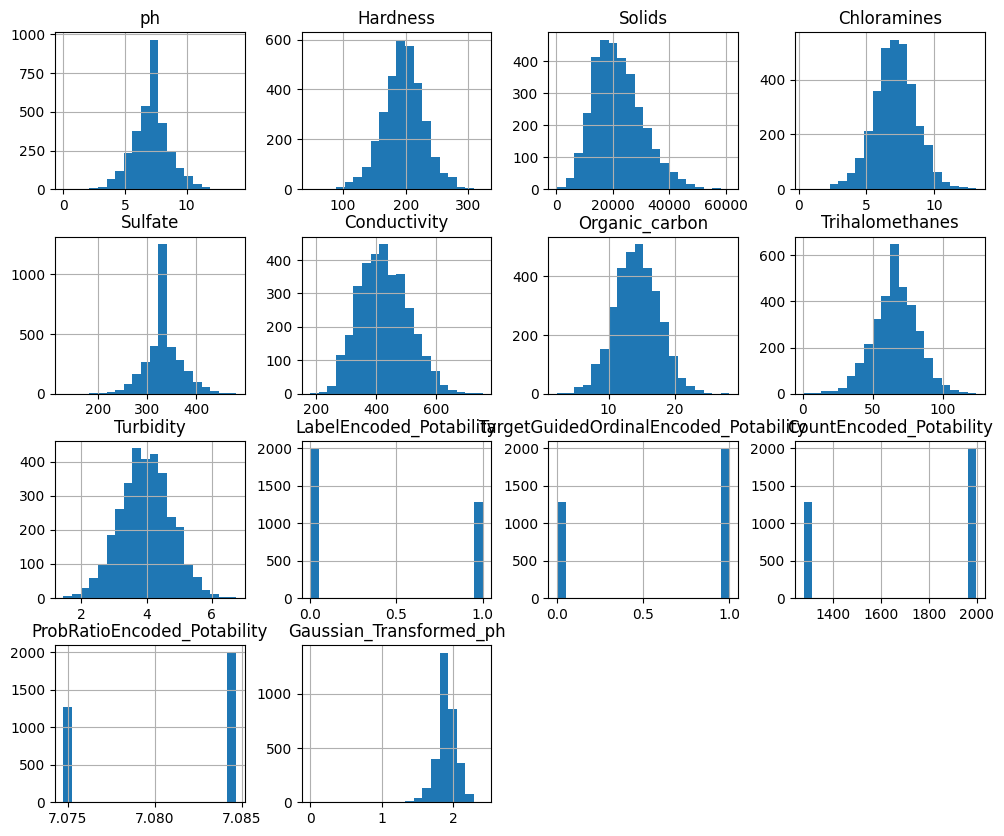

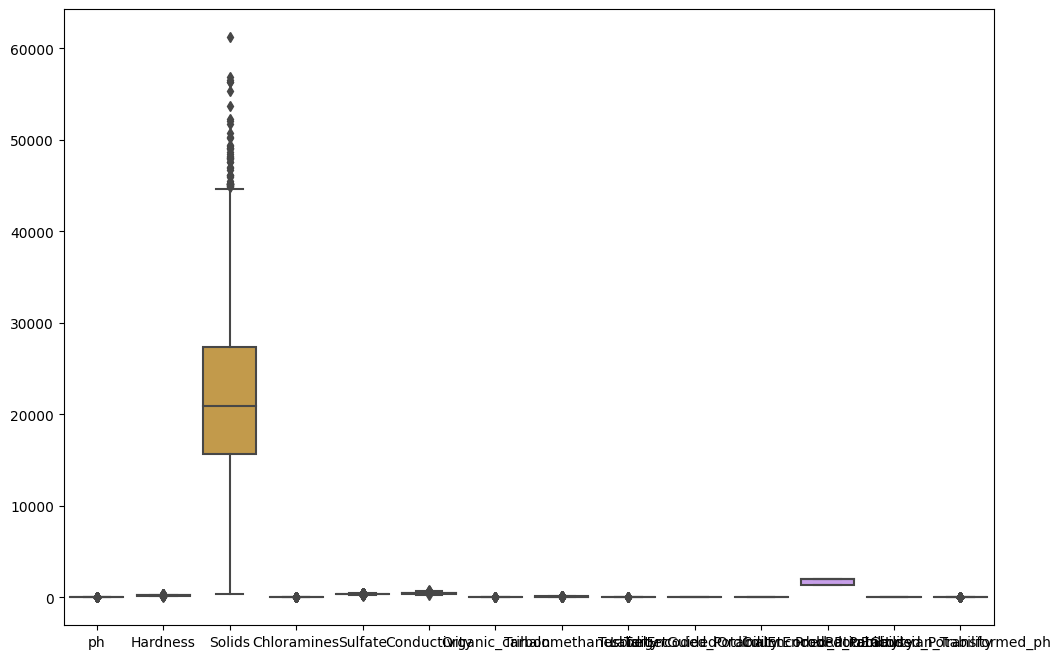

In [ ]:
#Distribution Analysis:
# Summary Statistics
summary_stats = data.describe()

# Histograms
data.hist(figsize=(12, 10), bins=20)
plt.show()

# Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.show()

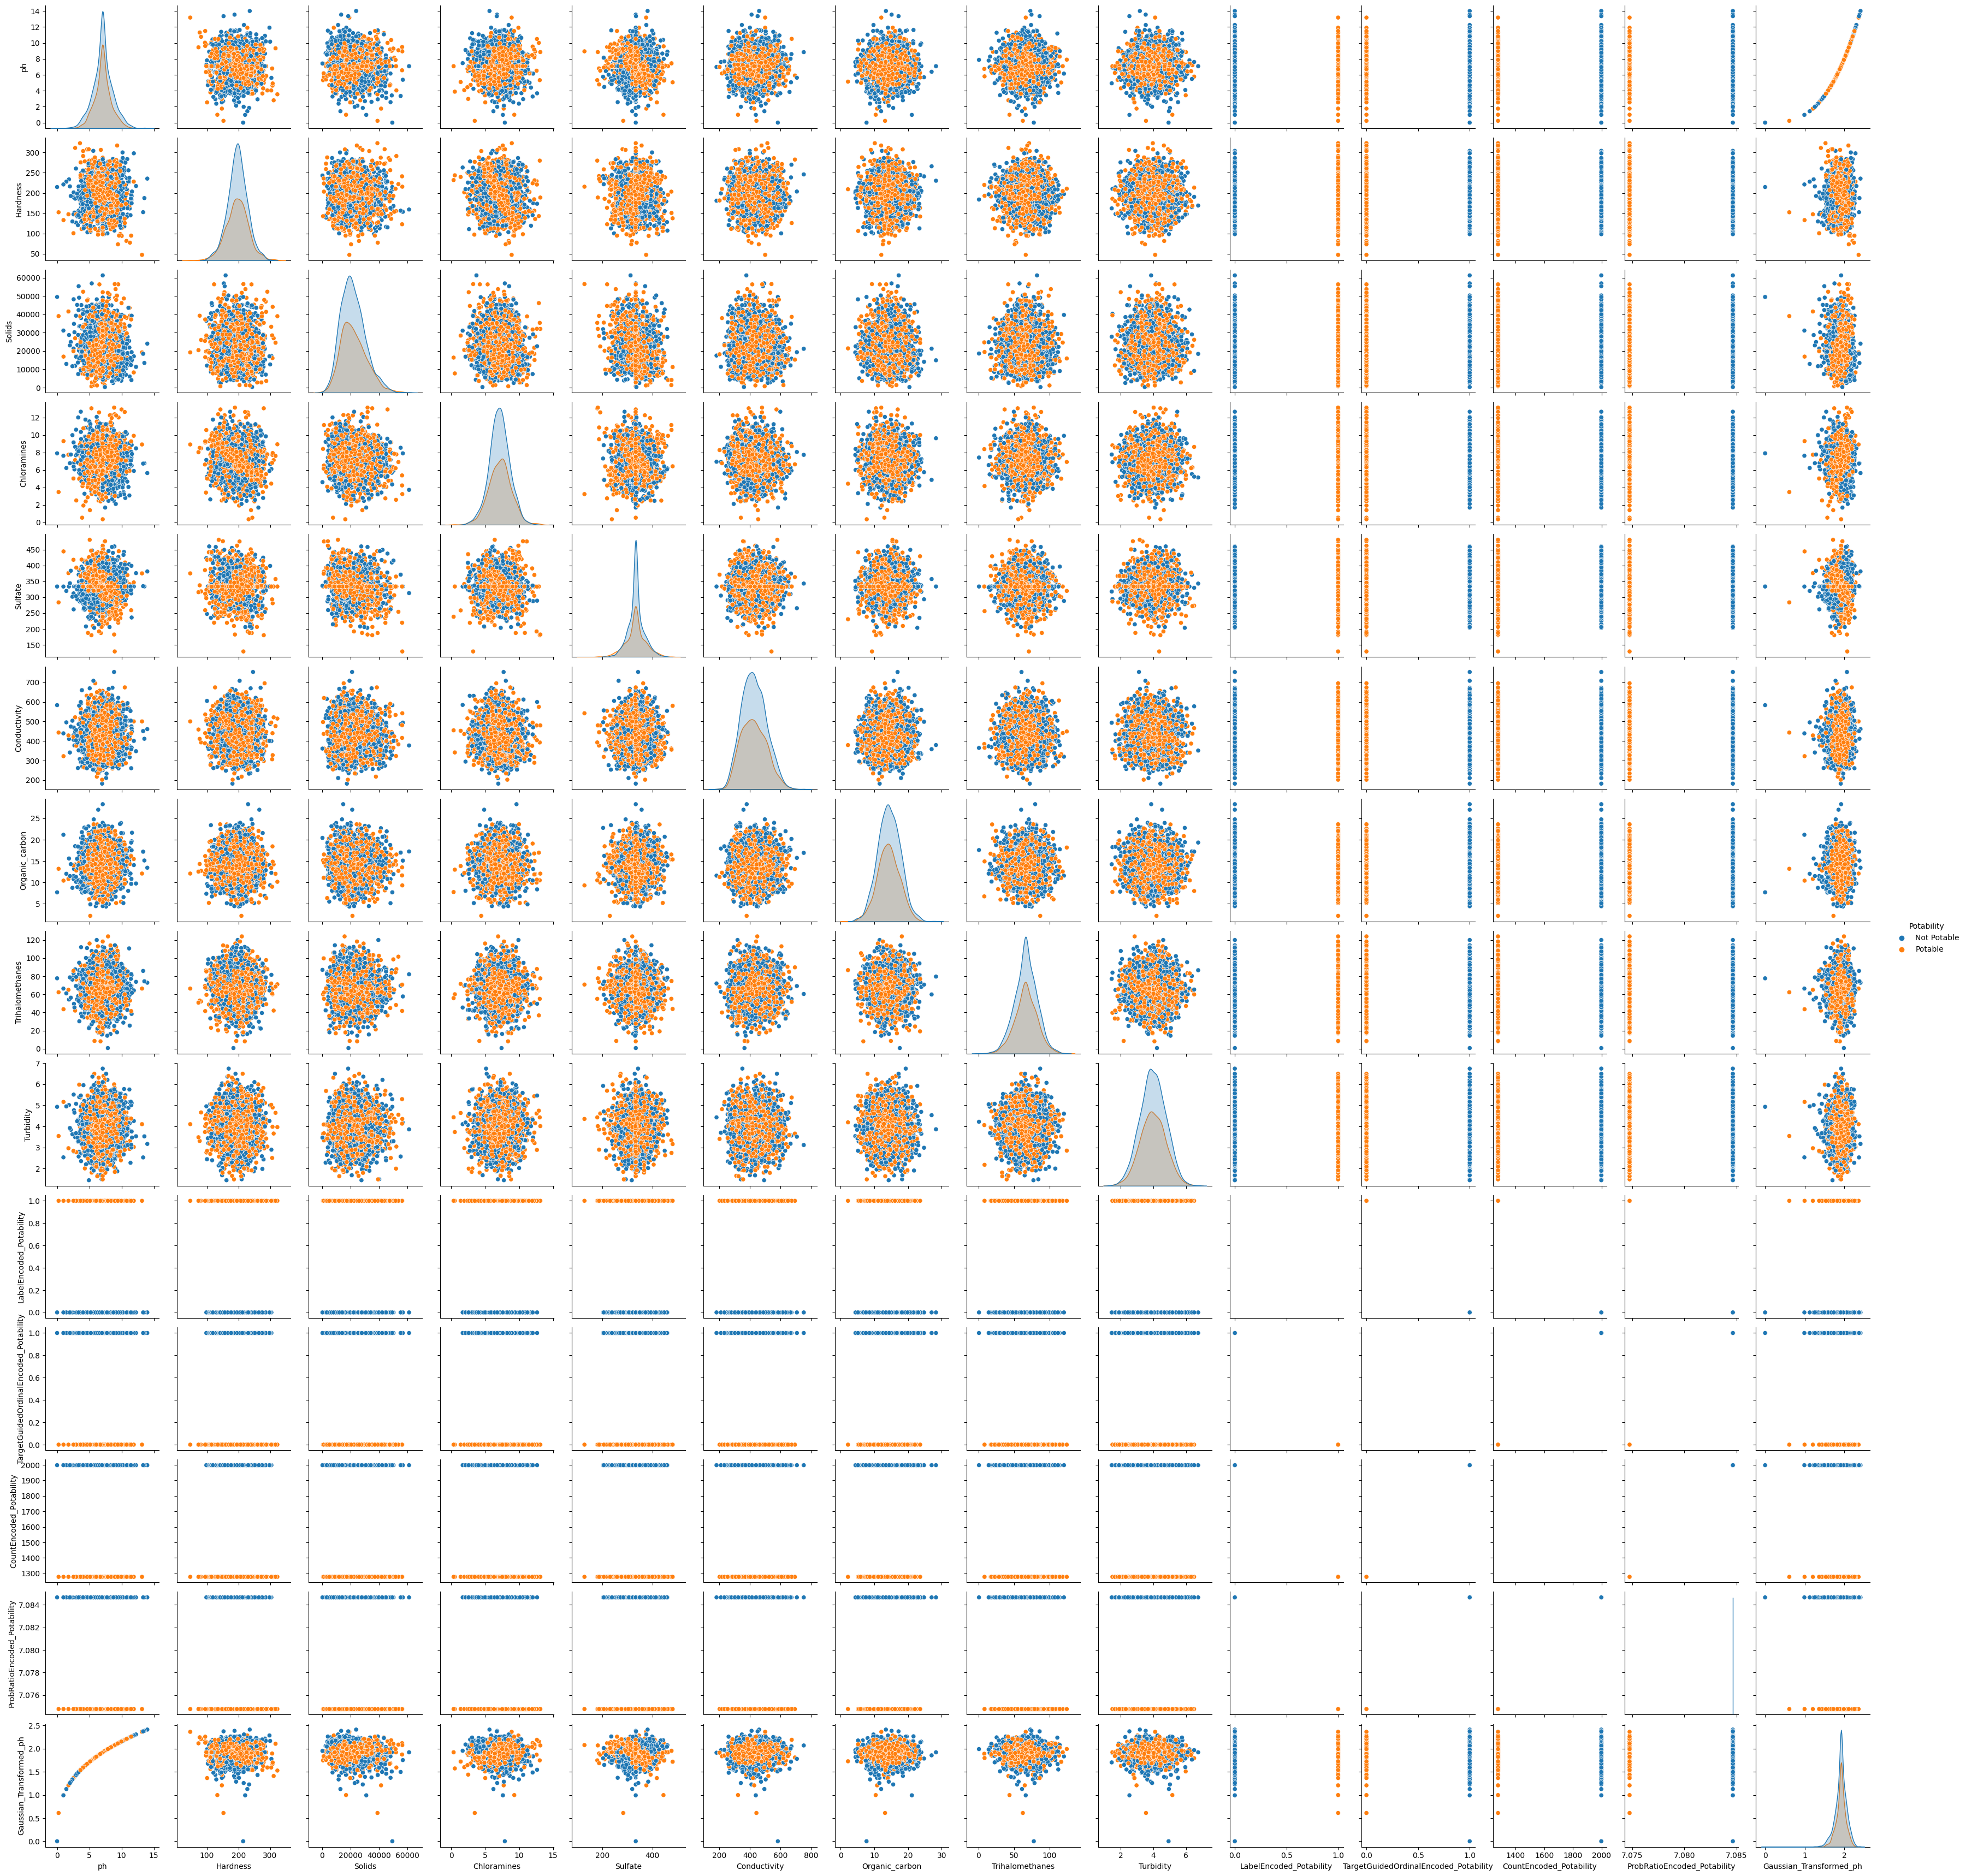

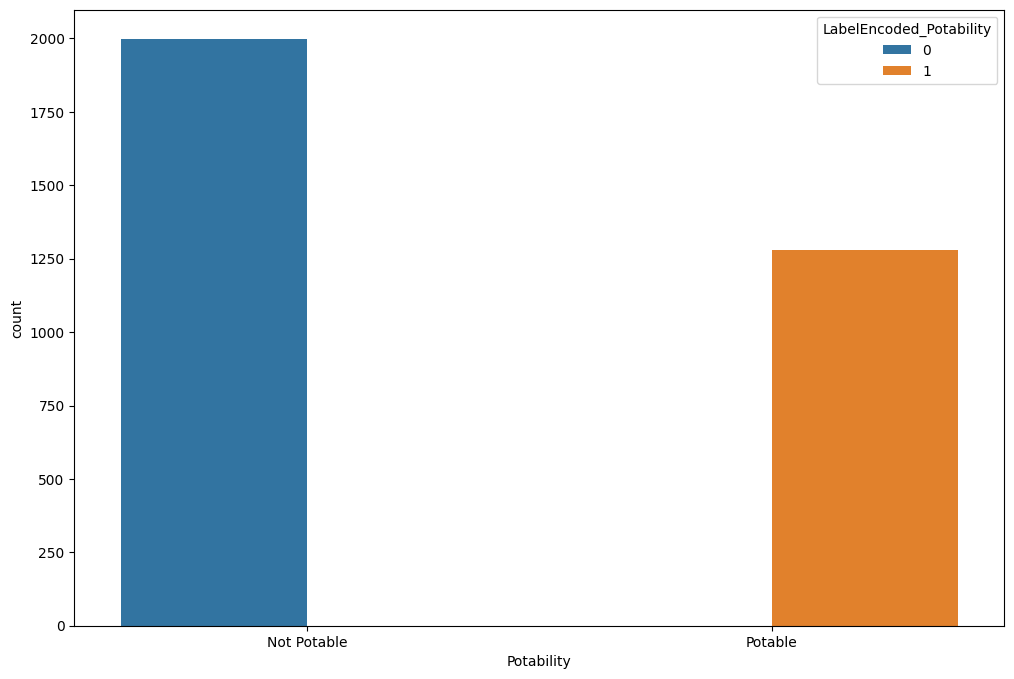

In [ ]:
# Bivariate Analysis:
# Scatter Plots for continuous variables
sns.pairplot(data, hue='Potability', diag_kind='kde')
plt.show()

# Bar Charts for categorical variables
plt.figure(figsize=(12, 8))
sns.countplot(x='Potability', hue='LabelEncoded_Potability', data=data)
plt.show()


<ipython-input-45-eb196ae66df9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


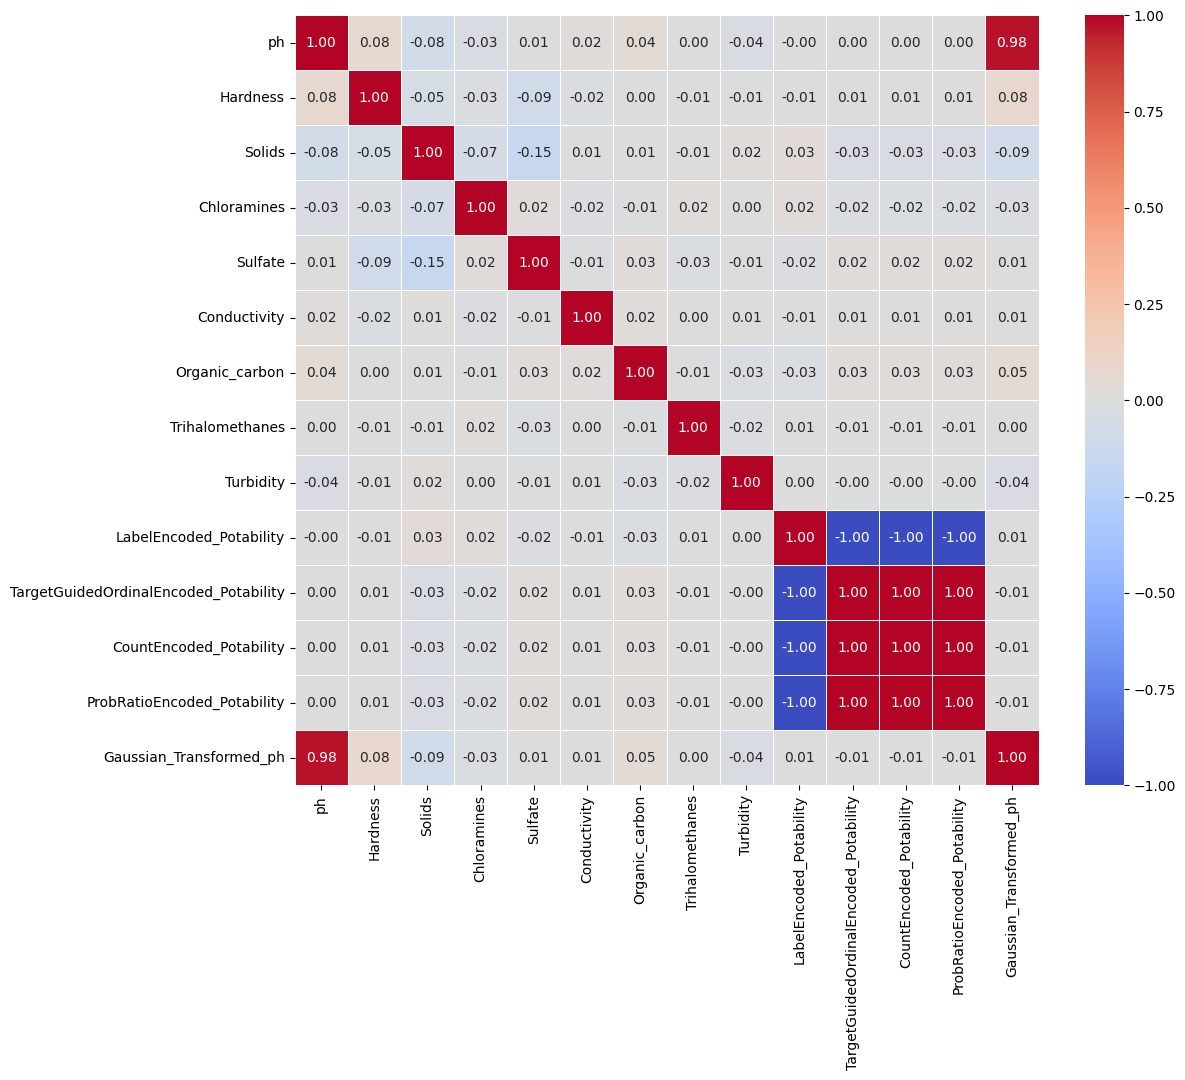

In [ ]:
# Multivariate Analysis & Feature Relationships:
# Heatmap for correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

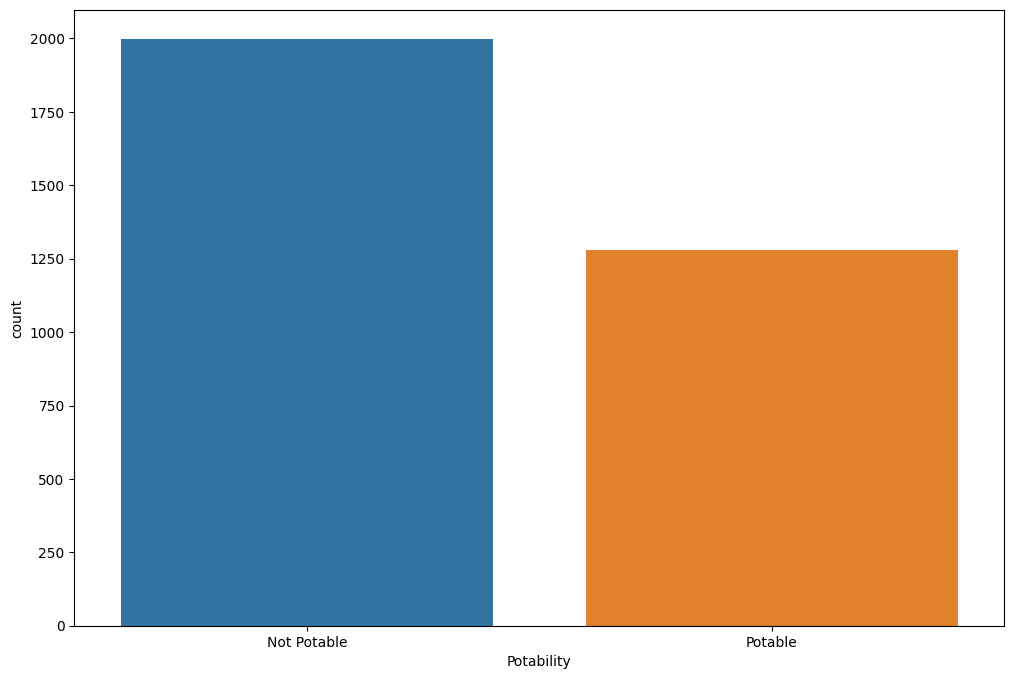

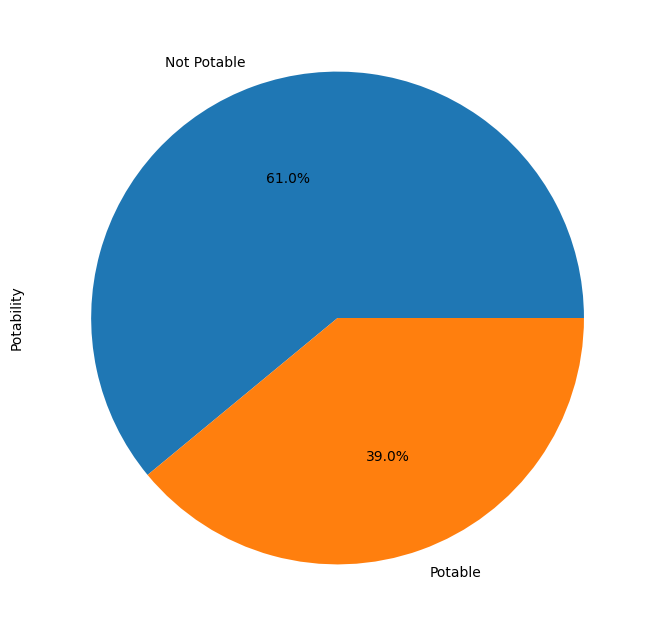

In [ ]:
#  Temporal Analysis:
# Bar Charts for categorical variables
plt.figure(figsize=(12, 8))
sns.countplot(x='Potability', data=data)
plt.show()

# Pie Chart for categorical variables
plt.figure(figsize=(8, 8))
data['Potability'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Not Potable', 'Potable'])
plt.show()

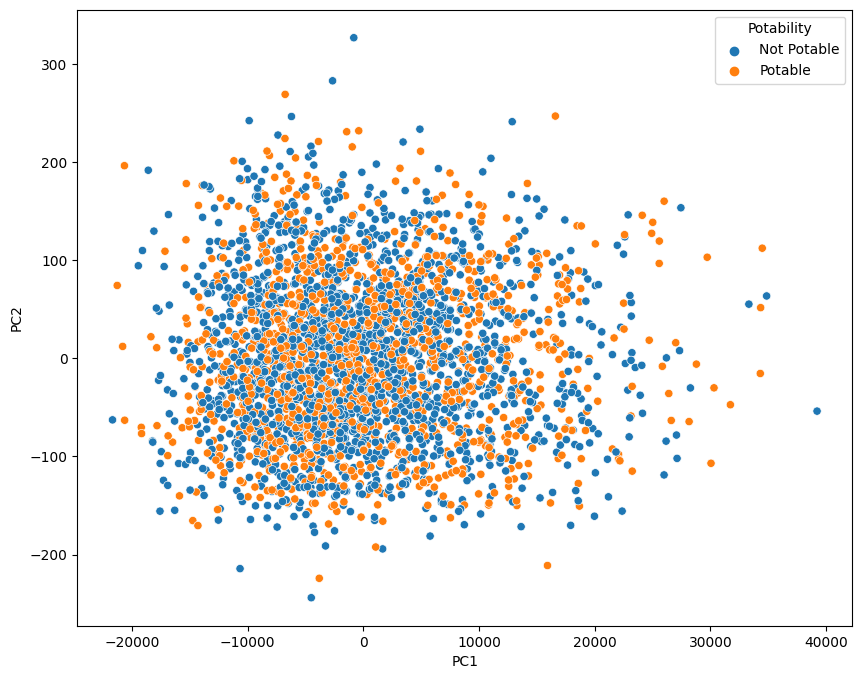

In [ ]:
# Dimensionality Reduction Visualization (PCA):
# Scatter Plot for PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Potability', data=data_pca)
plt.show()

In [ ]:
# Statistical & Hypothesis Tests:
from scipy.stats import ttest_ind, chi2_contingency
# t-test between 'ph' for Potable and Not Potable
t_stat, p_value = ttest_ind(data[data['Potability'] == 'Potable']['ph'], data[data['Potability'] == 'Not Potable']['ph'])
print("t-statistic:", t_stat, "\np-value:", p_value)

# Chi-square test between 'Potability' and 'LabelEncoded_Potability'
chi2, p, _, _ = chi2_contingency(pd.crosstab(data['Potability'], data['LabelEncoded_Potability']))
print("Chi-square statistic:", chi2, "\np-value:", p)

t-statistic: -0.18807051270751035 
p-value: 0.850833031271474
Chi-square statistic: 3271.798328169059 
p-value: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


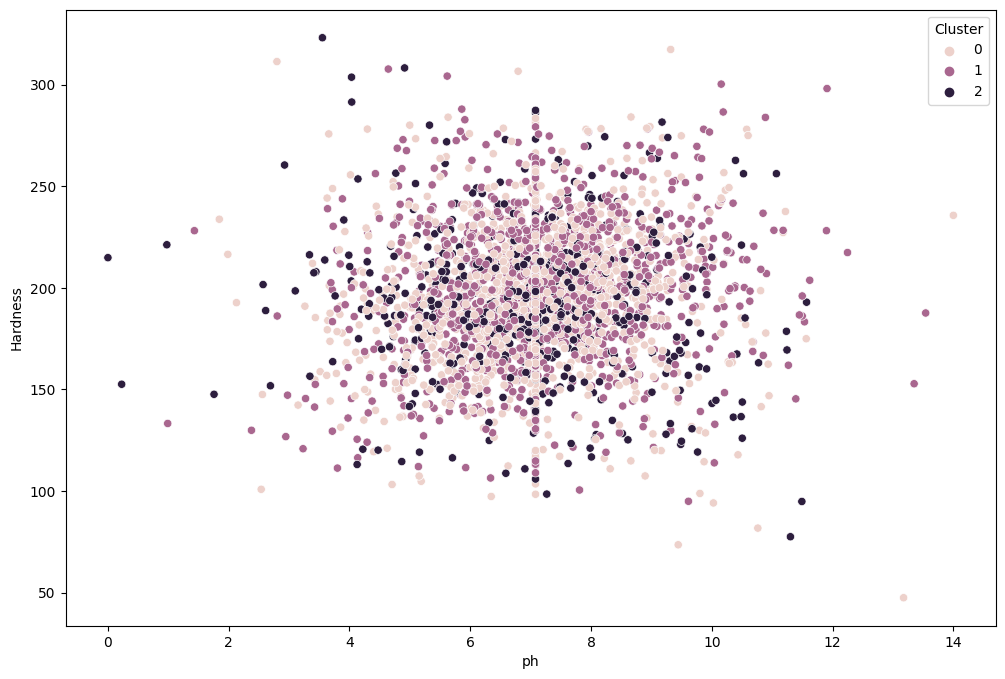

In [ ]:
# Segmentation Analysis:
from sklearn.cluster import KMeans

# Example: KMeans clustering based on selected features
features_for_clustering = ['ph', 'Hardness', 'Solids']
X_cluster = data[features_for_clustering]

# Fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_cluster)

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='ph', y='Hardness', hue='Cluster', data=data)
plt.show()


In [ ]:
data

# **5. Model Selection, Training & Evaluation - Crafting, Polishing, and Assessing the Winning Model**


In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define features (X) and target variable (y)
X = data.drop(['Potability', 'LabelEncoded_Potability'], axis=1)
y = data['Potability']

# Define algorithms to evaluate
algorithms = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Split the data into various proportions and evaluate algorithms
split_ratios = [(0.8, 0.2), (0.7, 0.3), (0.9, 0.1), (0.8, 0.1, 0.1), (0.9, 0.05, 0.05)]

for ratio in split_ratios:
    if len(ratio) == 2:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio[1], random_state=42)
    elif len(ratio) == 3:
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=ratio[1], random_state=42)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=ratio[2], random_state=42)

    print(f"\nData Split: {ratio}")
    for algo_name, algo in algorithms.items():
        algo.fit(X_train, y_train)
        if len(ratio) == 2:
            y_pred = algo.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
        elif len(ratio) == 3:
            y_pred = algo.predict(X_val)
            accuracy = accuracy_score(y_val, y_pred)
        print(f"{algo_name} Accuracy: {accuracy:.2f}")


Data Split: (0.8, 0.2)
Random Forest Accuracy: 1.00
Support Vector Machine Accuracy: 0.99
K-Nearest Neighbors Accuracy: 1.00

Data Split: (0.7, 0.3)
Random Forest Accuracy: 1.00
Support Vector Machine Accuracy: 0.98
K-Nearest Neighbors Accuracy: 1.00

Data Split: (0.9, 0.1)
Random Forest Accuracy: 1.00
Support Vector Machine Accuracy: 0.99
K-Nearest Neighbors Accuracy: 0.99

Data Split: (0.8, 0.1, 0.1)
Random Forest Accuracy: 1.00
Support Vector Machine Accuracy: 0.99
K-Nearest Neighbors Accuracy: 0.99

Data Split: (0.9, 0.05, 0.05)
Random Forest Accuracy: 1.00
Support Vector Machine Accuracy: 1.00
K-Nearest Neighbors Accuracy: 0.99


In [ ]:
# Import libraries
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import joblib
from joblib import dump, load
!pip install mlflow
import mlflow
from sklearn.utils.class_weight import compute_class_weight

# Define a function for model evaluation and metrics
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    print("Confusion Matrix:")
    print(confusion_matrix(y, y_pred))
    print("\nClassification Report:")
    print(classification_report(y, y_pred))

# Model Evaluation Metrics

# Example using Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

print("\nModel Evaluation Metrics:")
evaluate_model(rf_model, X_test, y_test)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00

Model Evaluation Metrics:
Confusion Matrix:
[[5 0]
 [0 4]]

Classification Report:
              precision    recall  f1-score   support

 Not Potable       1.00      1.00      1.00         5
     Potable       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00 

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters:")
print(grid_search.best_params_)



Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.0 MB/s eta 0:00:00


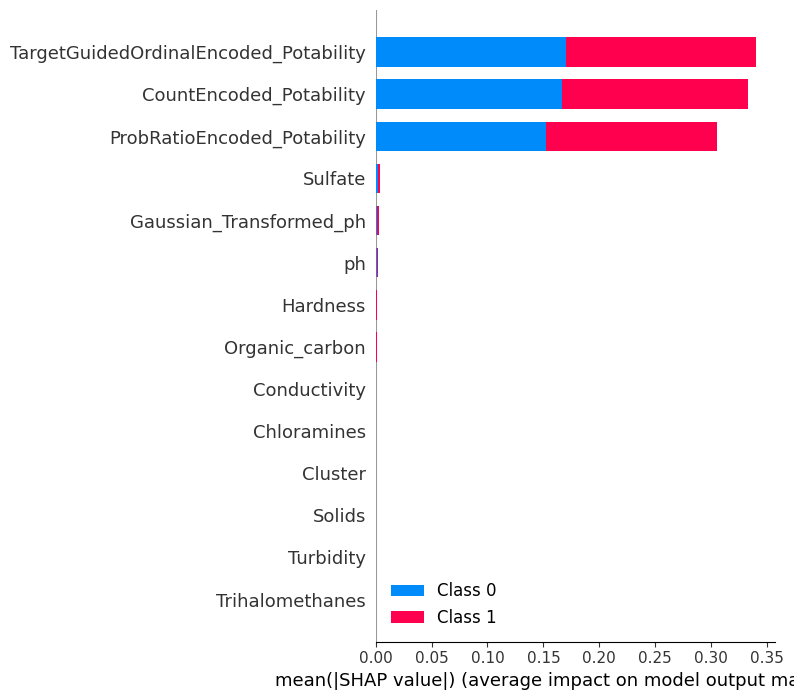

In [ ]:
# Model Interpretability & Explainability
!pip install shap
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
# Handling Imbalanced Data
# Use techniques like class weights or resampling methods. Example with class weights:
# Convert string labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Create a dictionary from class names to weights
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Fit the model with class weights
rf_model_weighted = RandomForestClassifier(class_weight=class_weight_dict)
rf_model_weighted.fit(X_train, y_train)


RandomForestClassifier(class_weight={'Not Potable': 0.8241525423728814,
                                     'Potable': 1.2712418300653594})

In [ ]:
# Save and Load Models
# Save model to file
joblib.dump(rf_model, 'rf_model.joblib')
# Download the saved model
from google.colab import files
files.download('rf_model.joblib')
# Load model from file
loaded_model = joblib.load('rf_model.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Experiment Logging and Versioning
# Use MLflow for experiment tracking and model versioning
with mlflow.start_run():
    mlflow.log_params({'n_estimators': 100, 'max_depth': 10})
    mlflow.sklearn.log_model(rf_model, 'model')

# Pipeline Integration
# Example pipeline with StandardScaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)


Setuptools is replacing distutils.


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [ ]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
!pip install joblib
import joblib
!pip install tpot
from tpot import TPOTClassifier
import mlflow

# Load the original data
original_data = pd.read_csv('/content/drive/MyDrive/New_water_potability.csv')

# Concatenate the original data
combined_data = pd.concat([original_data], ignore_index=True)

# Split the combined data into features (X) and target variable (y)
X = data.drop(['Potability', 'LabelEncoded_Potability'], axis=1)
y = data['Potability']

# Split the combined data into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Retrain the model using the combined data
rf_model_retrained = RandomForestClassifier()
rf_model_retrained.fit(X_train_combined, y_train_combined)

# Evaluate the retrained model
y_pred_combined = rf_model_retrained.predict(X_test_combined)
accuracy_combined = accuracy_score(y_test_combined, y_pred_combined)
print(f"Retrained Model Accuracy: {accuracy_combined:.2f}")

# Save the retrained model
joblib.dump(rf_model_retrained, 'rf_model_retrained.joblib')

# Log the retrained model in MLflow
with mlflow.start_run():
    mlflow.log_params({'n_estimators': 100, 'max_depth': 10})
    mlflow.sklearn.log_model(rf_model_retrained, 'model_retrained')

# Feedback Loop Completed

# Automated Model Selection and Hyperparameter Tuning using TPOT
!pip install tpot
# Note: Install TPOT using `pip install tpot`
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    offspring_size=10,
    verbosity=2,
    random_state=42,
    config_dict='TPOT sparse'
)

# Fit TPOT on the original data
tpot.fit(X, y)

# Get the best pipeline
best_pipeline = tpot.fitted_pipeline_

# Save the best pipeline
joblib.dump(best_pipeline, 'best_pipeline.joblib')

# Log the best pipeline in MLflow
with mlflow.start_run():
    mlflow.log_params(tpot.fitted_pipeline_.get_params())
    mlflow.sklearn.log_model(tpot.fitted_pipeline_, 'best_pipeline')

# Automated Model Selection and Hyperparameter Tuning Completed


Retrained Model Accuracy: 1.00


Optimization Progress:   0%|          | 0/70 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: BernoulliNB(input_matrix, alpha=0.1, fit_prior=True)
